Кабанова Е. R42951  
Лабораторная работа №3  
Вычисление элементарных функций  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

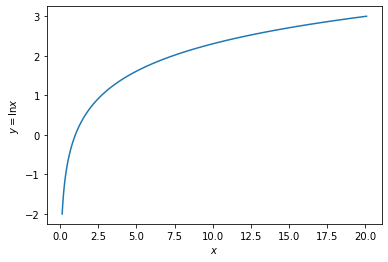

In [2]:
y=np.linspace(-2,3,100)
x=np.exp(y)
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$y=\ln x$')
plt.show()

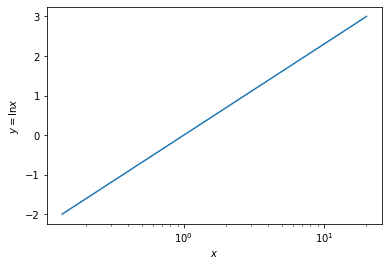

In [3]:
plt.semilogx(x,y)
plt.xlabel('$x$')
plt.ylabel('$y=\ln x$')
plt.show()

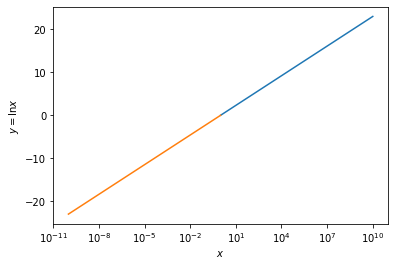

In [4]:
x=np.logspace(0,10,100)
y=np.log(x)
plt.semilogx(x,y)
plt.semilogx(1/x,-y)
plt.xlabel('$x$')
plt.ylabel('$y=\ln x$')
plt.show()

# Задание 1

[1.         1.0000101  1.0000202  1.0000303  1.0000404  1.00005051
 1.00006061 1.00007071 1.00008081 1.00009091 1.00010101 1.00011111
 1.00012121 1.00013131 1.00014141 1.00015152 1.00016162 1.00017172
 1.00018182 1.00019192 1.00020202 1.00021212 1.00022222 1.00023232
 1.00024242 1.00025253 1.00026263 1.00027273 1.00028283 1.00029293
 1.00030303 1.00031313 1.00032323 1.00033333 1.00034343 1.00035354
 1.00036364 1.00037374 1.00038384 1.00039394 1.00040404 1.00041414
 1.00042424 1.00043434 1.00044444 1.00045455 1.00046465 1.00047475
 1.00048485 1.00049495 1.00050505 1.00051515 1.00052525 1.00053535
 1.00054545 1.00055556 1.00056566 1.00057576 1.00058586 1.00059596
 1.00060606 1.00061616 1.00062626 1.00063636 1.00064646 1.00065657
 1.00066667 1.00067677 1.00068687 1.00069697 1.00070707 1.00071717
 1.00072727 1.00073737 1.00074747 1.00075758 1.00076768 1.00077778
 1.00078788 1.00079798 1.00080808 1.00081818 1.00082828 1.00083838
 1.00084848 1.00085859 1.00086869 1.00087879 1.00088889 1.0008

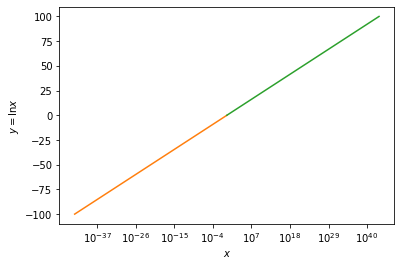

In [5]:
eps = 1e-3
n = 100/eps
x = np.linspace(1, 1 + eps, 100)
print(x)
y = np.log(x)
plt.semilogx(x, y)
plt.semilogx(x ** (-n), -n * y)
plt.semilogx(x ** n, n * y)
plt.xlabel('$x$')
plt.ylabel('$y=\ln x$')
plt.show()

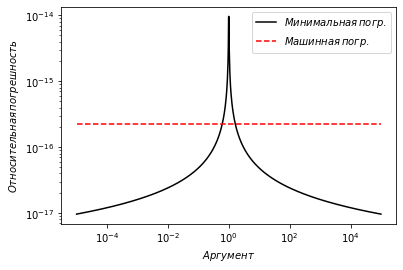

In [6]:
x0=np.logspace(-5,5,1000,dtype=np.double)
epsilon=np.finfo(np.double).eps
best_precision=(epsilon/2)*np.abs(1./np.log(x0))
plt.loglog(x0,best_precision, '-k')
plt.loglog(x0,np.full(x0.shape, epsilon), '--r')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\,погрешность$")
plt.legend(["$Минимальная\,погр.$","$Машинная\,погр.$"])
plt.show()

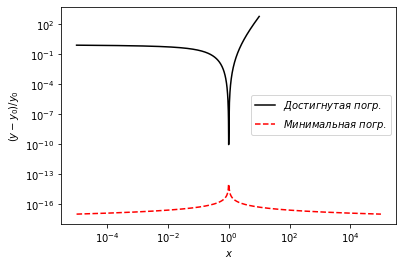

In [7]:
def relative_error(x0,x): return np.abs(x0-x)/np.abs(x0)

def log_teylor_series(x, N):
    a=x-1
    a_k=a # x в степени k. Сначала k=1
    y=a # Значене логарифма, пока для k=1.
    for k in range(2,N): # сумма по степеням
        a_k=-a_k*a # последовательно увеличиваем степень и учитываем множитель со знаком
        y=y+a_k/k
    return y

x=np.logspace(-5,1,1001)
y0=np.log(x)
y=log_teylor_series(x, 5)
plt.loglog(x,relative_error(y0,y),'-k')
plt.loglog(x0,best_precision,'--r')
plt.xlabel('$x$')
plt.ylabel('$(y-y_0)/y_0$')
plt.legend(["$Достигнутая\;погр.$", "$Минимальная\;погр.$"],loc=5)
plt.show()

# Задание 2

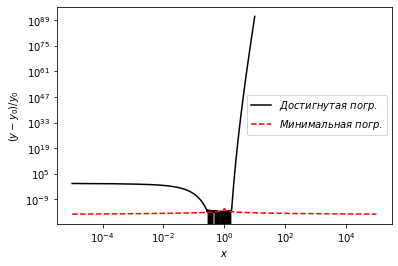

In [8]:
def get_N(eps):
    return (1 - eps) / eps


x0 = np.logspace(-5, 5, 1000, dtype=np.double)
epsilon = np.finfo(np.double).eps
best_precision = (epsilon / 2) * np.abs(1. / np.log(x0))

x = np.logspace(-5, 1, 1001)
y0 = np.log(x)
y = log_teylor_series(x, N = int(get_N(10e-3)))
plt.loglog(x, relative_error(y0, y), '-k')
plt.loglog(x0, best_precision, '--r')
plt.xlabel('$x$')
plt.ylabel('$(y-y_0)/y_0$')
plt.legend(["$Достигнутая\;погр.$", "$Минимальная\;погр.$"], loc=5)
plt.show()

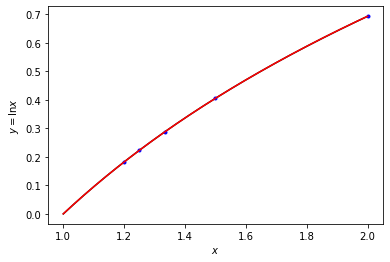

In [10]:
# Узлы итерполяции
N=5
xn=1+1./(1+np.arange(N))
yn=np.log(xn)
# Тестовые точки
x=np.linspace(1+1e-10,2,1000)
y=np.log(x)
# Многочлен лагранжа
import scipy.interpolate
L=scipy.interpolate.lagrange(xn,yn)
yl=L(x)
plt.plot(x,y,'-k')
plt.plot(xn,yn,'.b')
plt.plot(x,yl,'-r')
plt.xlabel("$x$")
plt.ylabel("$y=\ln x$")
plt.show()

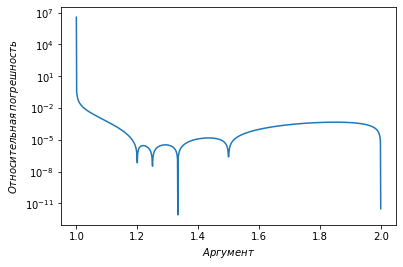

In [11]:
plt.semilogy(x,relative_error(y,yl))
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

# Задание 3

In [17]:
N=10
xn=1+1./(1+np.arange(N))
un=(3*(xn-1))/(2*(xn+1))

kn = np.arange(N)
def update_un(a, b):
    return ((b-a)/2)*np.cos(((2*kn+1)*np.pi) / (2*(kn+1)))+((a+b)/2)

optimize_un = update_un(0, 1)

y_xn = np.log(xn)
y_un = np.log(un)
y_optimize_un = np.log(optimize_un)

# Тестовые точки
x_xn = np.linspace(xn[9], xn[0], 1000)
x_un = np.linspace(un[9], un[0], 1000)
x_optimize_un = np.linspace(optimize_un[9], optimize_un[0], 1000)

y_xn_res = np.log(x_xn)
y_un_res = np.log(x_un)
y_optimize_un_res = np.log(x_optimize_un)

# Многочлен лагранжа
L_n = scipy.interpolate.lagrange(xn, y_xn)
L_u = scipy.interpolate.lagrange(un, y_un)
L_optimize_un = scipy.interpolate.lagrange(optimize_un, y_optimize_un)

y1 = L_n(x_xn)
y2 = L_u(x_un)
y3 = L_optimize_un(x_optimize_un)

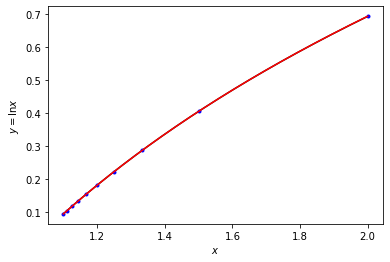

In [18]:
plt.plot(x_xn, y_xn_res, '-k')
plt.plot(xn, y_xn,'.b')
plt.plot(x_xn, y1,'-r')
plt.xlabel("$x$")
plt.ylabel("$y=\ln x$")
plt.show()

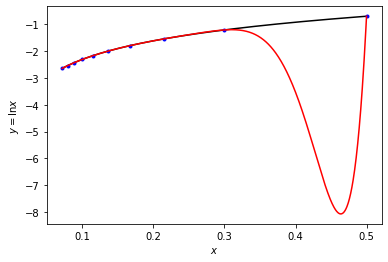

In [19]:
plt.plot(x_un, y_un_res,'-k')
plt.plot(un, y_un,'.b')
plt.plot(x_un, y2,'-r')
plt.xlabel("$x$")
plt.ylabel("$y=\ln x$")
plt.show()

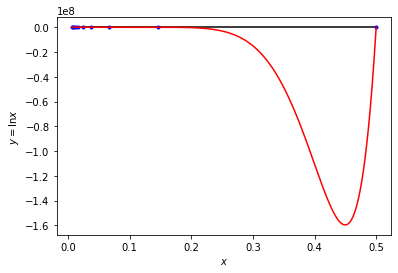

In [20]:
plt.plot(x_optimize_un, y_optimize_un_res,'-k')
plt.plot(optimize_un, y_optimize_un,'.b')
plt.plot(x_optimize_un, y3,'-r')
plt.xlabel("$x$")
plt.ylabel("$y=\ln x$")
plt.show()

Сравним точности:

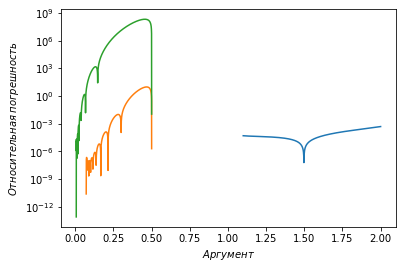

In [21]:
plt.semilogy(x_xn, relative_error(y_xn_res, y1))
plt.semilogy(x_un, relative_error(y_un_res, y2))
plt.semilogy(x_optimize_un, relative_error(y_optimize_un_res, y3))

plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

# Задание 4

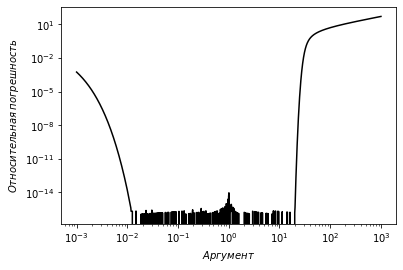

In [22]:
def log_newton(x, N=10):
    y=1 # начальное приближение
    for j in range(N):
        y=y-1+x/np.exp(y)
    return y

x=np.logspace(-3,3,1000)
y0=np.log(x)
y=log_newton(x)
plt.loglog(x,relative_error(y0,y),'-k')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

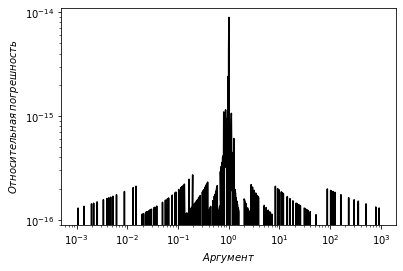

In [23]:
def new_log_newton(x, eps = 6.66133814776e-16):
    y = 1 # начальное приближение
    while True:
        diff = -1 +  x / np.exp(y)
        a, b = min(diff), max(diff)
        m = max(abs(a), abs(b))
        if m < eps:
            break
        y = y - 1 + x / np.exp(y)
    return y


x = np.logspace(-3, 3, 1000)
y0 = np.log(x)
y = new_log_newton(x)
plt.loglog(x, relative_error(y0, y), '-k')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()